In [4]:
import pandas as pd

from geopy.distance import geodesic  

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:

file_path = '2022_OCELOT_deployement_summary.xlsx' 

df = pd.read_excel(file_path)

file_id = df['File'].to_numpy()
latitude  = df['Latitude'].to_numpy()
longitude = df['Longitude'].to_numpy()

surrounding_stations = {}

for i, fid in enumerate(file_id):
    center_coord = (latitude[i], longitude[i])
    neighbors = []

    for j, other_fid in enumerate(file_id):
        if i == j:
            continue  # skip self
        other_coord = (latitude[j], longitude[j])
        dist_km = geodesic(center_coord, other_coord).kilometers

        if dist_km <= 0.4:  # 0.4 km
            neighbors.append((other_fid, latitude[j], longitude[j], dist_km))

    surrounding_stations[fid] = neighbors

station_id = 5
station = file_id[station_id]

print(f"Neighbors of {station}:")
for neighbor in surrounding_stations[station]:
    print(f"  ID: {neighbor[0]}, Lat: {neighbor[1]}, Lon: {neighbor[2]}, Distance: {neighbor[3]:.2f} km")

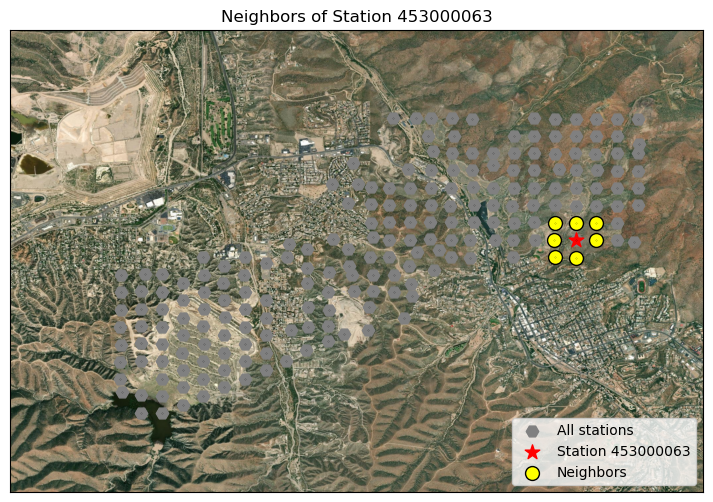

In [ ]:
mpl.rcParams['figure.figsize'] = [12, 6]

station_id = 5
station = file_id[station_id]
station_lat = latitude[station_id]
station_lon = longitude[station_id]
neighbors = surrounding_stations[station]

neighbor_lats = [n[1] for n in neighbors]
neighbor_lons = [n[2] for n in neighbors]

# Plotting
m = Basemap(resolution='i', projection='cyl',
            llcrnrlat=33.375, urcrnrlat=33.435,
            llcrnrlon=-110.855, urcrnrlon=-110.765)

m.arcgisimage(service='World_Imagery', xpixels=2000, dpi=300, verbose=False)
m.drawstates()

m.scatter(longitude, latitude, s=80, marker='H', color='gray',  label='All stations')

m.scatter(station_lon, station_lat, s=120, marker='*', color='red', label=f'Station {station}')

m.scatter(neighbor_lons, neighbor_lats, s=100, marker='o', color='yellow', edgecolor='black', label='Neighbors')

for fid, lat, lon in zip(file_id, latitude, longitude):
    m.plot(lon, lat, 'ko', markersize=0.1)  
   

plt.legend(loc='lower right')
plt.title(f"Neighbors of Station {station}")
plt.show()
